<a href="https://colab.research.google.com/github/harshithap99/Hand_drawn_Sketch_recognition/blob/main/Train_from_scratch_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd 
import keras 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import glob
from sklearn.datasets import load_files
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.utils import np_utils
from sklearn.model_selection import  train_test_split

In [3]:
img=glob.glob(("/content/drive/My Drive/sketch_80/*"))
for i in img:
    print(i)

/content/drive/My Drive/tempdata/cannon
/content/drive/My Drive/tempdata/camera
/content/drive/My Drive/tempdata/castle
/content/drive/My Drive/tempdata/candle
/content/drive/My Drive/tempdata/camel
/content/drive/My Drive/tempdata/canoe
/content/drive/My Drive/tempdata/cell phone
/content/drive/My Drive/tempdata/car (sedan)
/content/drive/My Drive/tempdata/carrot
/content/drive/My Drive/tempdata/cat
/content/drive/My Drive/tempdata/cake
/content/drive/My Drive/tempdata/bush
/content/drive/My Drive/tempdata/butterfly
/content/drive/My Drive/tempdata/bread
/content/drive/My Drive/tempdata/calculator
/content/drive/My Drive/tempdata/bulldozer
/content/drive/My Drive/tempdata/cactus
/content/drive/My Drive/tempdata/cabinet
/content/drive/My Drive/tempdata/bus
/content/drive/My Drive/tempdata/bridge
/content/drive/My Drive/tempdata/bowl
/content/drive/My Drive/tempdata/boomerang
/content/drive/My Drive/tempdata/book
/content/drive/My Drive/tempdata/binoculars
/content/drive/My Drive/tempda

In [4]:
dir = '/content/drive/My Drive/sketch_80'
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x, y,target_labels = load_dataset(dir)
print('Loading complete!')

Loading complete!
Training set size :  3200


In [5]:
no_of_classes = len(np.unique(y))
no_of_classes
y= np_utils.to_categorical(y,no_of_classes)

40

In [8]:
#dividing the entire dataset into training data and validation data
X_train,x_val,Y_train,y_val = train_test_split(x,y,test_size=0.18,random_state=42)
#dividing the training dataset into training and testing
X_train,x_test,Y_train,y_test = train_test_split(X_train,Y_train,test_size=0.22,random_state=42)
X_train.shape,Y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape
# sum should result in total
print(len(X_train))
print(len(x_val))
print(len(x_test))

2046
576
578
/content/drive/My Drive/tempdata/boomerang/2086.png
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
/content/drive/My Drive/tempdata/blimp/1890.png
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
default_image_size=tuple((256,256))
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
         # Convert to Numpy Array
        image=cv2.imread(file)
        if image is not None :
          image=cv2.resize(image, default_image_size) 
          images_as_array.append(img_to_array(image))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
x_val = np.array(convert_image_to_array(x_val))
x_test = np.array(convert_image_to_array(x_test))
print('Validation set shape : ',x_val.shape)
print('Training set shape : ',X_train.shape)
print('Test set shape : ',x_test.shape)

Training set shape :  (2046, 256, 256, 3)
Validation set shape :  (576, 256, 256, 3)
Test set shape :  (578, 256, 256, 3)
1st training image shape  (256, 256, 3)


In [11]:
# time to re-scale so that all the pixel values lie within 0 to 1
X_train = X_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

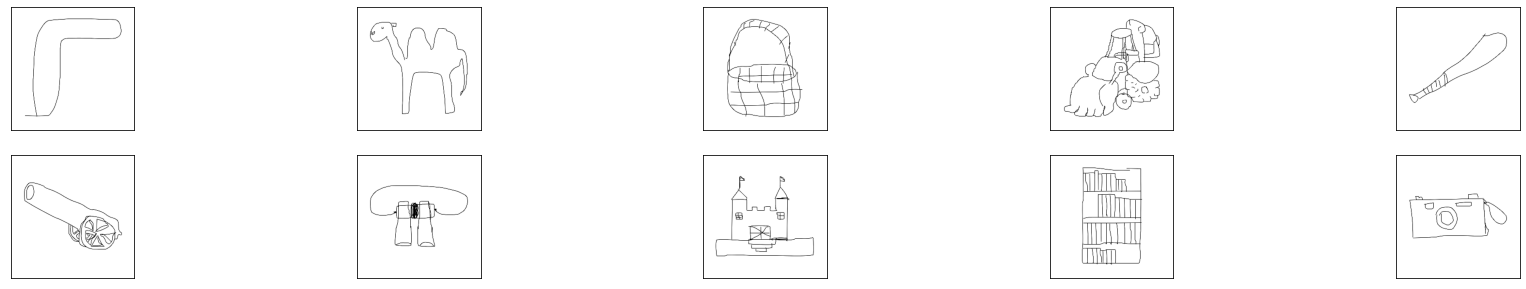

In [12]:
#Let's visualize the first 10 training images!
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [18]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(no_of_classes, activation='softmax'))

model.summary()

In [21]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [22]:
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [27]:
checkpoint = ModelCheckpoint(filepath = 'cnn3.hdf5',monitor='val_accuracy' ,verbose = 1, save_best_only = True)
model_dropout = model.fit_generator(imagegen.flow(X_train,Y_train, batch_size=64),epochs=10,verbose=2,
                          validation_data=(x_val, y_val),steps_per_epoch=X_train.shape[0] // 64,callbacks=[checkpoint],shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10

Epoch 00001: val_accuracy improved from -inf to 0.02778, saving model to cnn3.hdf5
31/31 - 82s - loss: 3.9827 - accuracy: 0.0757 - val_loss: 13.0841 - val_accuracy: 0.0278
Epoch 2/10

Epoch 00002: val_accuracy did not improve from 0.02778
31/31 - 30s - loss: 3.5179 - accuracy: 0.1135 - val_loss: 24.6442 - val_accuracy: 0.0278
Epoch 3/10

Epoch 00003: val_accuracy did not improve from 0.02778
31/31 - 30s - loss: 3.4702 - accuracy: 0.1302 - val_loss: 21.1390 - val_accuracy: 0.0278
Epoch 4/10

Epoch 00004: val_accuracy did not improve from 0.02778
31/31 - 30s - loss: 3.3268 - accuracy: 0.1280 - val_loss: 23.1407 - val_accuracy: 0.0278
Epoch 5/10

Epoch 00005: val_accuracy did not improve from 0.02778
31/31 - 30s - loss: 3.1746 - accuracy: 0.1594 - val_loss: 26.9622 - val_accuracy: 0.0260
Epoch 6/10

Epoch 00006: val_accuracy did not improve from 0.02778
31/31 - 30s - loss: 3.0693 - accuracy: 0.1831 - v

In [29]:
test_eval = model.evaluate(x_test, y_test, verbose=2)

19/19 - 1s - loss: 13.4106 - accuracy: 0.0502


In [31]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
y_true = np.argmax(y_test,axis = 1).astype(int)

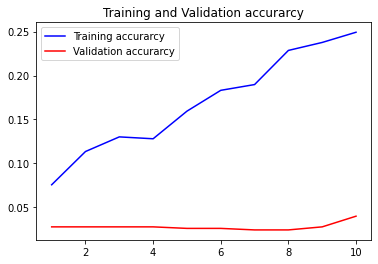

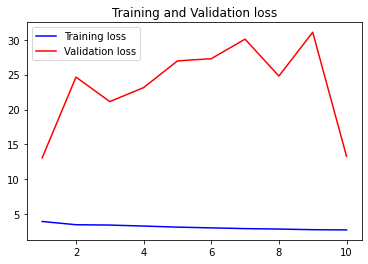

In [32]:
acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [33]:
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("Found %d correct" %(corr_count))
print("Found %d incorrect " %(incorr_count))

Found 29 correct
Found 549 incorrect 


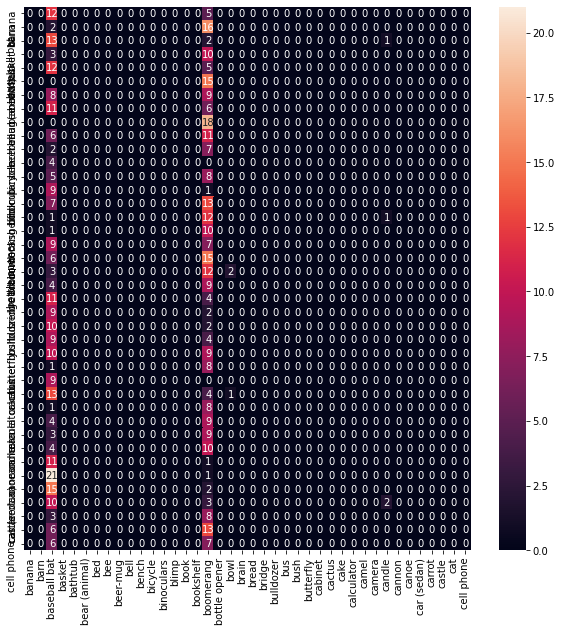

In [38]:
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()

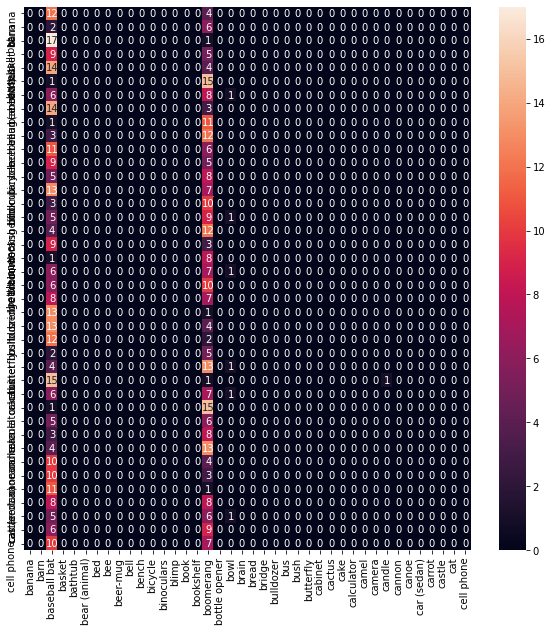

In [39]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()